# Deprecated-Two Figures

Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_entry_time(ns)',
       'update_inode_time(ns)', 'journal_time(ns)',
       'update_page_tail_time(ns)'],
      dtype='object')
Index(['data_read_time(ns)', 'data_write_time(ns)', 'update_index_time(ns)',
       'update_inode_time(ns)', 'journal_time(ns)', 'update_dentry_time(ns)'],
      dtype='object')
10


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


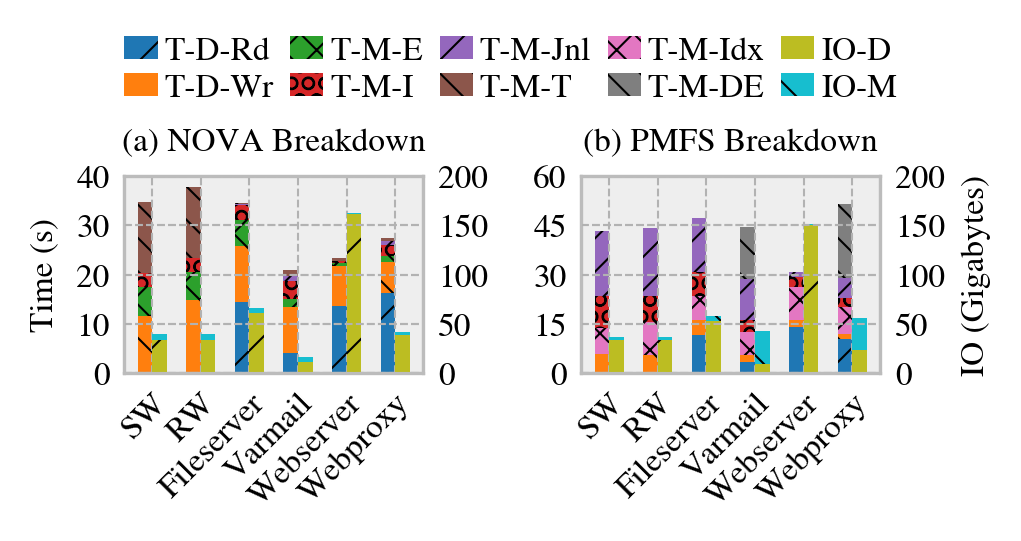

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA Breakdown", "(b) PMFS Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","Fileserver", "Varmail", "Webserver", "Webproxy"]

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = df.columns[14:]
    breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 2, fid + 1)
    ax2 = subfig.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        bottom = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            height = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            
            bar, = subfig.bar(x=pivot, height=height, color=plt.get_cmap(cmap)(global_color_idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            bottom = bottom + height 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    if fid == 0:
        subfig.set_yticks([0, 10, 20, 30, 40])
        subfig.set_yticklabels([0, 10, 20, 30, 40], fontsize=8)
        subfig.set_ylabel("Time (s)", fontsize=8)
    else:
        subfig.set_yticks([0, 15, 30, 45, 60])
        subfig.set_yticklabels([0, 15, 30, 45, 60], fontsize=8)
    
    subfig.set_xticks(x)
    subfig.set_xticklabels(workloads_remap, fontsize=8, rotation=45, ha="right", rotation_mode="anchor")

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        bottom = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.bar(x=pivot, height=IO, color=plt.get_cmap(cmap)(8 + idx), bottom=bottom, width=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            bottom = bottom + IO
            if workload_id == 0 and fid == 1:
                bars.append(bar)
    ax2.set_yticks([0, 50, 100, 150, 200])
    ax2.set_yticklabels([0, 50, 100, 150, 200], fontsize=8)
    if fid == 1:
        ax2.set_ylabel("IO (Gigabytes)", fontsize=8)
    
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)

    plt.title(titles[fid], fontsize=8)


    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=5, bbox_to_anchor=(0.5, 1.15), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-MetaObservation.pdf", bbox_inches='tight', pad_inches=0)


# Deprecated-Amplification

11.26172947883606
12.526299238204956
8.197546826675534
21.92910734936595
0.0
11.531339689157903
9.23071002960205
13.51009464263916
13.133158531971276
16.81608377210796
0.0
10.458660976029932


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


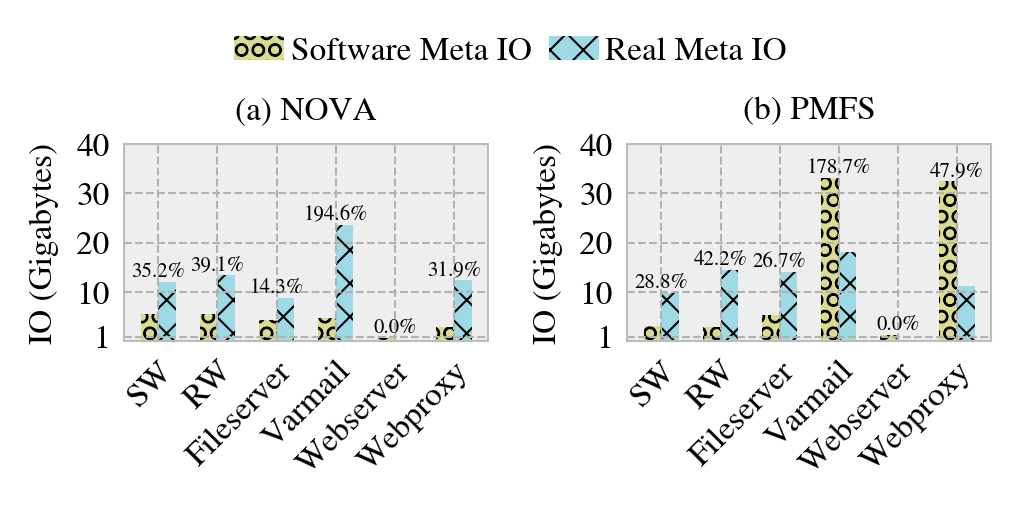

In [1]:
# import matplotlib
# import matplotlib.pyplot as plt
# from matplotlib import style
# import pandas as pd
# import numpy as np

# # Paper specific settings
# STANDARD_WIDTH = 17.8
# SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
# DOUBLE_COL_WIDTH = STANDARD_WIDTH
# def cm_to_inch(value):
#     return value/2.54

# matplotlib.rcParams['text.usetex'] = False
# style.use('bmh')
# plt.rcParams["axes.grid"] = True
# plt.rcParams["axes.grid.axis"] = "both"
# plt.rcParams["grid.linewidth"] = 0.5
# plt.rcParams['hatch.linewidth'] = 0.5
# plt.rcParams["font.family"] = "Nimbus Roman"
# pd.options.display.max_columns = None
# pd.options.display.max_rows = None

# fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
# bar_width = 0.3
# inner_width = 0.1
# files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
# titles = ["(a) NOVA", "(b) PMFS"]
# workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
# workloads_remap = ["SW", "RW","Fileserver", "Varmail", "Webserver", "Webproxy"]

# x = list(range(1, len(workloads) + 1))
# patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
# for fid, file in enumerate(files):
#     with open(file, "r") as f:
#         df = pd.read_csv(f, delim_whitespace=True, engine='python')
    
#     subfig = plt.subplot(1, 2, fid + 1)
#     subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
#     ax = fig.gca()
#     lw = 0.5
#     for axis in ['top','bottom','left','right']:
#         ax.spines[axis].set_linewidth(lw)

#     software_meta_ios = []
#     real_meta_ios = []
#     # data_ios = []
#     # amps = []
#     for workload_idx, workload in enumerate(workloads):
#         data_write = df[df['workloads'] == workload]["data_write(bytes)"].iloc[0]
#         data_read = df[df['workloads'] == workload]["data_read(bytes)"].iloc[0]
#         media_write = df[df['workloads'] == workload]["media_write(byte)"].iloc[0]
#         media_read = df[df['workloads'] == workload]["media_read(byte)"].iloc[0]
#         meta_write = df[df['workloads'] == workload]["meta_write(bytes)"].iloc[0]
#         meta_read = df[df['workloads'] == workload]["meta_read(bytes)"].iloc[0]

#         # write_amp = media_write / (data_write + meta_write)
#         # 1 if (media_write - data_write) / meta_write < 1 else (media_write - data_write) / meta_write
#         # read_amp = 0 if media_read - media_write - data_read < 0 else media_read - media_write - data_read
#         # read_amp = (media_read - media_write) / (data_read + meta_read) 
#         # amp = 1 if ((media_read - media_write) + media_write - data_write - data_read) / (meta_read + meta_write) < 1 else ((media_read - media_write) + media_write - data_write - data_read) / (meta_read + meta_write)
#         # ((media_read - media_write) + media_write) / (data_read + meta_read + data_write + meta_write)
#         # 1 if (media_read - media_write - data_read) / meta_read < 1 else (media_read - media_write - data_read) / meta_read 
#         # software_meta_ios.append(write_amp)
#         # real_meta_ios.append(read_amp)
#         # amps.append(amp)
#         software_meta_IO = meta_write + meta_read
#         real_meta_IO = 0 if media_write + media_read - media_write - data_write - data_read < 0 else media_write + media_read - media_write - data_write - data_read 
#         software_meta_ios.append(software_meta_IO / 1000000000)
#         real_meta_ios.append(real_meta_IO / 1000000000)
#         # data_ios.append(real_meta_IO / (data_write + data_read))
#         height = real_meta_IO / 1000000000 if real_meta_IO > software_meta_IO else software_meta_IO / 1000000000 
#         subfig.text(workload_idx + 1, height + 2, "{:.1f}%".format(real_meta_IO * 100 / (data_write + data_read)), fontsize=5, ha="center", va="center", color="black")
#         print(real_meta_IO / 1024 / 1024 / 1024)

#     subfig.bar([i - bar_width / 2 for i in x], software_meta_ios, width=bar_width, label="Write", color=plt.get_cmap("tab20")(17), hatch=patterns[3])
#     subfig.bar([i + bar_width / 2 for i in x], real_meta_ios, width=bar_width, label="Read", color=plt.get_cmap("tab20")(19), hatch=patterns[6])
    

#     # subfig.bar(x, amps, width=bar_width, label="Write", color=plt.get_cmap("tab20")(0), hatch=patterns[fid])
#     subfig.set_xticks(x)
#     subfig.set_xticklabels(workloads_remap, rotation=45, ha="right", rotation_mode="anchor", fontsize=8)

#     subfig.set_yticks([0, 1, 10, 20, 30, 40])
#     subfig.set_yticklabels(["", "1", "10", "20", "30", "40"], fontsize=8)
#     # subfig.set_yticks([0, 1, 2, 3])
#     # subfig.set_yticklabels(["", "1", "2", "3"], fontsize=8)

#     # subfig.plot(x, data_ios, color=plt.get_cmap("tab20")(0), marker="o", markersize=3, linewidth=0.5, label="Data")
#     subfig.set_title(titles[fid], fontsize=8)
#     # if fid == 0:
#     subfig.set_ylabel("IO (Gigabytes)", fontsize=8)

# legend_labels = ["Software Meta IO", "Real Meta IO"]
# fig.legend(legend_labels, loc='center', bbox_to_anchor=(0.5, 1), ncol=2, fontsize=8, frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1.5, borderpad=0.2, labelspacing=0.2)
# plt.tight_layout()
# plt.savefig("./FIG-MetaAmp.pdf", bbox_inches='tight', pad_inches=0)


# Large Figure for Time Breakdown (Metadata Time & Data Time Only)

['data_time(ns)', 'meta_time(ns)']
['data_time(ns)', 'meta_time(ns)']
4


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


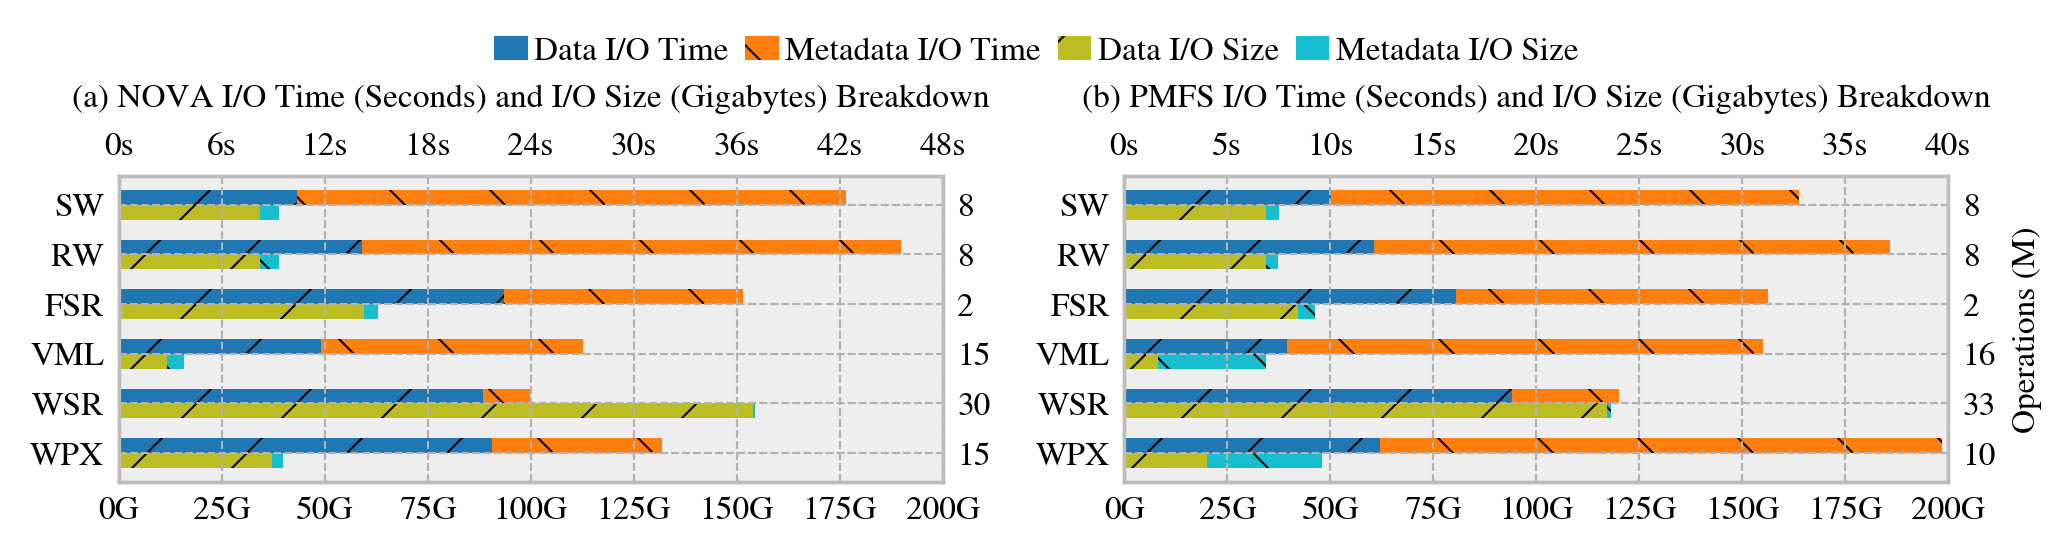

In [120]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(DOUBLE_COL_WIDTH), cm_to_inch(4.5)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown", "(b) PMFS I/O Time (Seconds) and I/O Size (Gigabytes) Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-NOVA", "./performance-comparison-table-PMFS"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","FSR", "VML", "WSR", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60]
]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    # breakdown_times = ["data_time(ns)", "meta_time(ns)"]
    # breakdown_times = df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")

    # for workload_id, workload in enumerate(workloads):
    #     _sum = 0
    #     for idx, time in enumerate(breakdown_times):
    #         if idx == 0 or idx == 1:
    #             _sum += df.loc[df['workloads'] == workload, time]
    #             if idx == 1:
    #                 df.loc[df['workloads'] == workload, "data_time(ns)"] = _sum
    #                 _sum = 0
    #         else:
    #             _sum += df.loc[df['workloads'] == workload, time]
    #             df.loc[df['workloads'] == workload, "meta_time(ns)"] = _sum
    
    breakdown_times = ["data_time(ns)", "meta_time(ns)"]

    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    ax2 = plt.subplot(1, 2, fid + 1)
    subfig = ax2.twiny()
    ax3 = ax2.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        left = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            
            bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(global_color_idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            left = left + width 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    # subfig.set_xlabel("I/O Time (Seconds)", fontsize=8)
    if fid == 0:
        xticks = [0, 6, 12, 18, 24, 30, 36, 42, 48]
        subfig.set_xticks(xticks)
        subfig.set_xticklabels([str(xtick) + "s" for xtick in xticks], fontsize=8)
    else:
        # (0, 60]
        xticks = [0, 5, 10, 15, 20, 25, 30, 35, 40]
        subfig.set_xlim(0, 40)
        subfig.set_xticks(xticks)
        subfig.set_xticklabels([str(xtick) + "s" for xtick in xticks], fontsize=8)
        # subfig.set_xticklabels([0, 5.5, 11, 16.5, 22, 27.5, 33, 38.5, 44], fontsize=8)
    
    subfig.set_yticks(x)
    if fid == 0:
        subfig.set_yticklabels(workloads_remap, fontsize=8)
    else:
        subfig.set_yticklabels([], fontsize=8)

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        left = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.barh(y=pivot, width=IO, color=plt.get_cmap(cmap)(8 + idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            left = left + IO
            if workload_id == 0 and fid == 1:
                bars.append(bar)
    
    xticks = [0, 25, 50, 75, 100, 125, 150, 175, 200]
    ax2.set_xticks(xticks)
    ax2.set_xticklabels([str(xtick) + "G" for xtick in xticks], fontsize=8)
    # if fid == 1:
    # ax2.set_xlabel("I/O Size (Gigabytes)", fontsize=8)
    ax2.set_yticklabels(workloads_remap, fontsize=8)
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax3.set_ylim(subfig.get_ylim())
    ax3.set_yticks(x)
    op = ops[fid]
    op.reverse()
    ax3.set_yticklabels([str(int(i / 1000000)) for i_idx, i in enumerate(op)], fontsize=8)
    if fid == 1:
        ax3.set_ylabel("Operations (M)", fontsize=8)
    # ax3.set_ylabel("Operations (M)", fontsize=8)
    # ax3.get_yaxis().set_tick_params(pad=32)
    ax3.tick_params(bottom=False, top=False, left=False, right=False)
    plt.title(titles[fid], fontsize=8)

    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["Data I/O Time", "Metadata I/O Time", "Data I/O Size", "Metadata I/O Size" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-MetaObservation.pdf", bbox_inches='tight', pad_inches=0)


# KILLER-Study-Data&Medadata

['data_time(ns)', 'meta_time(ns)']
22.799234919
7.920126294
23.372740155
0.57234378
12.179719432
13.311784309
29.838387238
10.826879677
11.386235822
10.062411429
6.575383383
3.341258403
4


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


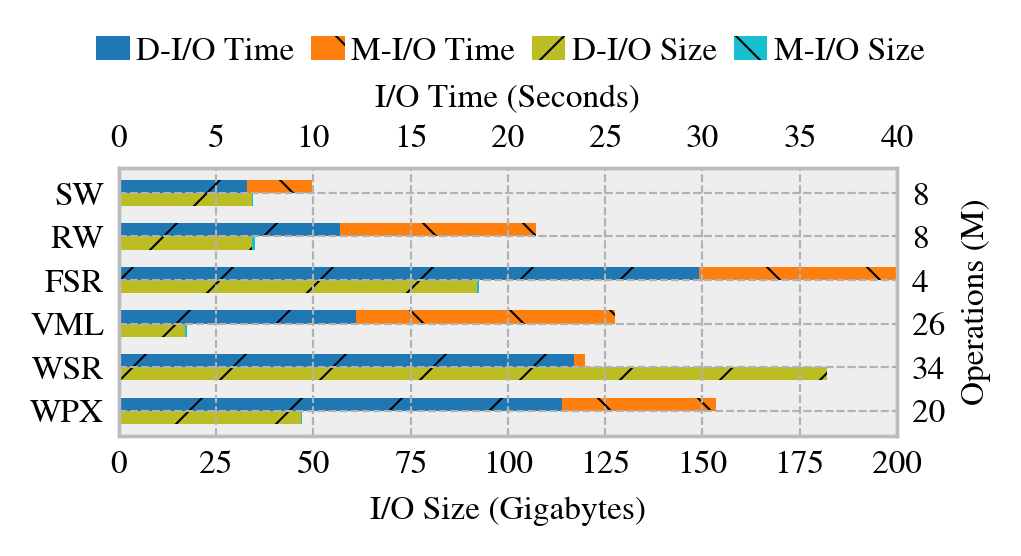

In [1]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None

ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60]
]
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4.5)))
bar_width = 0.3
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '\\', 'XXX', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time and I/O Size Breakdown", "(b) PMFS I/O Time and I/O Size Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW","FSR", "VML", "WSR", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')

    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = ["data_time(ns)", "meta_time(ns)"]
    # df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    ax2 = plt.subplot(1, 1, fid + 1)
    subfig = ax2.twiny()
    ax3 = ax2.twinx()
    
    for workload_id, workload in enumerate(workloads):
        # global_color_idx = 0
        global_color_idx = fid * len(breakdown_times) 
        left = 0
        pivot = x[workload_id] + bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        for idx, time in enumerate(breakdown_times):
            width = df[(df['workloads'] == workload)][time].iloc[0] / 1000000000
            
            orig_global_color_idx = global_color_idx
            if fid == 1 and idx in [0, 1, 3, 4]:
                global_color_idx = color_map[time]
            print(width)
            bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(global_color_idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label=time)
            left = left + width 
            
            global_color_idx = orig_global_color_idx

            if fid == 0:
                color_map[time] = global_color_idx
                global_color_idx += 1
                if workload_id == 0:
                    bars.append(bar)
            else:
                if idx not in [0, 1, 3, 4]:
                    global_color_idx += 1
                if workload_id == 0:
                    if idx not in [0, 1, 3, 4]:
                        bars.append(bar)
                
    subfig.set_xlabel("I/O Time (Seconds)", fontsize=8)
    if fid == 0:
        subfig.set_xlim([0, 40])
        subfig.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
        subfig.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=8)
    else:
        subfig.set_xticks([0, 11, 22, 33, 44])
        subfig.set_xticklabels([0, 11, 22, 33, 44], fontsize=8)
    
    subfig.set_yticks(x)
    if fid == 0:
        subfig.set_yticklabels(workloads_remap, fontsize=8)
        ax2.set_yticklabels(workloads_remap, fontsize=8)
    else:
        subfig.set_yticklabels([], fontsize=8)

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    
    
    # plt.yticks(x, labels=workloads_remap, fontsize=8)
    # subfig = plt.subplot(2, 2, fid * len(files) + 2)
   
    for workload_id, workload in enumerate(workloads):
        left = 0
        pivot = x[workload_id] - bar_width / 2
        inner_left = 0
        inner_left_range = []
        start = False
        merged_breakdown_IO = []
        width = 0
        for idx, IO in enumerate(breakdown_IO):
            width += df[(df['workloads'] == workload)][IO].iloc[0] / 1000000000
            if idx == 1 or idx == 3:
                merged_breakdown_IO.append(width)
                width = 0
        
        for idx, IO in enumerate(merged_breakdown_IO):
            bar, = ax2.barh(y=pivot, width=IO, color=plt.get_cmap(cmap)(8 + idx), left=left, height=bar_width, hatch=patterns[idx],linewidth=0.5, label="D-IO" if idx == 0 else "M-IO")
            left = left + IO
            if workload_id == 0:
                bars.append(bar)
    
    ax2.set_xticks([0, 25, 50, 75, 100, 125, 150, 175, 200])
    ax2.set_xticklabels([0, 25, 50, 75, 100, 125, 150, 175, 200], fontsize=8)
    # if fid == 1:
    ax2.set_xlabel("I/O Size (Gigabytes)", fontsize=8)
    
    # plt.yticks(x, labels=[], fontsize=8)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    ax2.tick_params(bottom=False, top=False, left=False, right=False)

    ax3.set_ylim(subfig.get_ylim())
    ax3.set_yticks(x)
    op = ops[2]
    op.reverse()
    # ax3.set_yticklabels([str(int(i / 1000000)) + " MOps" if i_idx != 4 and i_idx != 5 else str(int(i / 1000)) + " KOps" for i_idx, i in enumerate(op)], fontsize=7, ha="right", va = "center")
    # # print(subfig.get_yaxis().get_tick_padding())
    # ax3.get_yaxis().set_tick_params(pad=30)
    ax3.set_yticklabels([str(int(i / 1000000)) for i_idx, i in enumerate(op)], fontsize=8)
    # if fid == :
    ax3.set_ylabel("Operations (M)", fontsize=8)
    ax3.tick_params(bottom=False, top=False, left=False, right=False)

    # plt.title(titles[fid], fontsize=8)


    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["D-I/O Time", "M-I/O Time", "D-I/O Size", "M-I/O Size" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-KILLERStudy.pdf", bbox_inches='tight', pad_inches=0)


# KILLER Performance Breakdown - Vertical

       workloads  meta_read(bytes)  meta_write(bytes)  meta_total(bytes)  \
20    webproxy.f                 0          436998622          436998622   
18     varmail.f                 0          748844275          748844275   
17  fileserver.f                 0          730017662          730017662   
6          write                 0          537002498          537002498   
7           read                 0          537002563          537002563   
8      randwrite                 0          537002498          537002498   
19   webserver.f                 0           62699495           62699495   
3          write                 0           68027307           68027307   
4           read                 0          537002563          537002563   
5      randwrite                 0          537002330          537002330   
16    webproxy.f                 0          415452004          415452004   
15   webserver.f                 0            8875862            8875862   
14     varma

'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


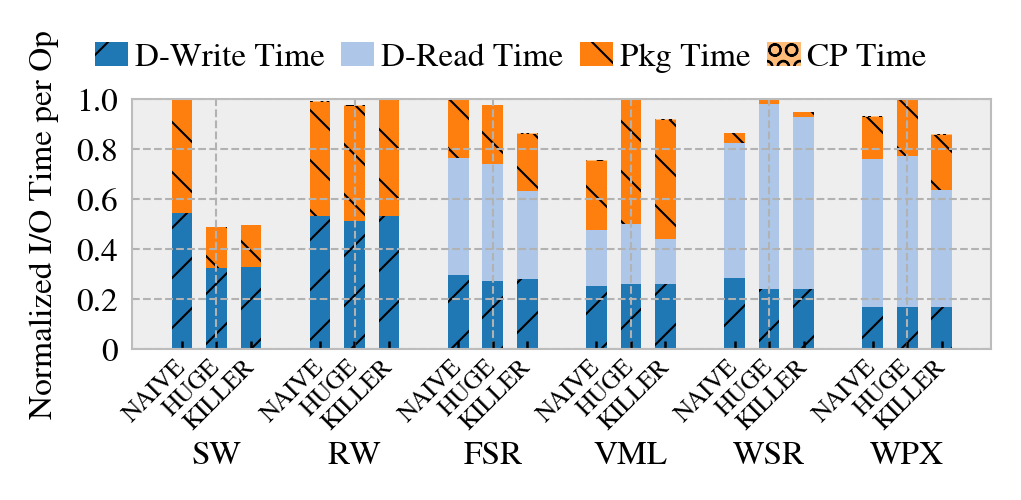

In [6]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.25
true_width = 0.15
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['//', '', '\\\\', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time and I/O Size Breakdown", "(b) PMFS I/O Time and I/O Size Breakdown"]
scales = [4, 1]
cmap="tab20"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW", "FSR", "VML", "WSR", "WPX"]
# workloads = ["write", "webproxy.f"]
# workloads_remap = ["SW", "WPX"]

# workloads.reverse()
# workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')
    sort_dict = {
        "KILLER" : 2, 
        "KILLER-NO-PREFETCH": 1,
        "KILLER-NAIVE": 0,
    }
    sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
    df = df.iloc[sort_df.sort_values(by = ["file_system"]).index]
    print(df)
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    
    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = ["data_write_time(ns)", "data_read_time(ns)", "update_package_time(ns)", "update_bm_time(ns)"]
    # df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 1, fid + 1) 
    # ax2 = subfig.twinx()
    pivots = []
    
    workload_map = {
        "write": [],
        "randwrite": [],
        "fileserver.f": [],
        "varmail.f": [],
        "webserver.f": [],
        "webproxy.f": []
    }

    for fs_idx, fs in enumerate(fss):
        for workload_id, workload in enumerate(workloads):
            total_time = 0
            for idx, time in enumerate(breakdown_times):
                width = df[(df['workloads'] == workload) & (df['file_system'] == fs)][time].iloc[0] / 1000000000 / int(df[(df['workloads'] == workload) & (df['file_system'] == fs)]["ops"].iloc[0])
                total_time += width
            workload_map[workload].append(total_time)
    
    for fs_idx, fs in enumerate(fss):
        for workload_id, workload in enumerate(workloads):
            # global_color_idx = 0
            global_color_idx = fid * len(breakdown_times) 
            left = 0
            # for pivot in x:
            #     point = pivot - len(fss) * bar_width / 2 + bar_width / 2 + idx * bar_width
            #     points.append(point)
            # - tot / 2 + bar_width / 2 + idx * bar_width
            
            pivot = x[workload_id] - len(fss) * bar_width / 2 + bar_width / 2 + fs_idx * bar_width 
            pivots.append(pivot)
            # + bar_width / 2
            inner_left = 0
            inner_left_range = []
            start = False
            for idx, time in enumerate(breakdown_times):
                width = df[(df['workloads'] == workload) & (df['file_system'] == fs)][time].iloc[0] / 1000000000 / int(df[(df['workloads'] == workload) & (df['file_system'] == fs)]["ops"].iloc[0]) / max(workload_map[workload]) 
                
                orig_global_color_idx = global_color_idx
                if fid == 1 and idx in [0, 1, 3, 4]:
                    global_color_idx = color_map[time]
                
                bar, = subfig.bar(x=pivot, height=width, color=plt.get_cmap(cmap)(global_color_idx), bottom=left, width=true_width, hatch=patterns[idx],linewidth=0.5, label=time)
                left = left + width 
                
                global_color_idx = orig_global_color_idx

                if fid == 0:
                    color_map[time] = global_color_idx
                    global_color_idx += 1
                    if workload_id == 0:
                        bars.append(bar)
                else:
                    if idx not in [0, 1, 3, 4]:
                        global_color_idx += 1
                    if workload_id == 0:
                        if idx not in [0, 1, 3, 4]:
                            bars.append(bar)
                
    subfig.set_ylabel("Normalized I/O Time per Op", fontsize=8)
    if fid == 0:
        subfig.set_ylim([0, 1])
        subfig.set_yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])
        subfig.set_yticklabels([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize=8)
        # subfig.set_yticks([0, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000])
        # subfig.set_yticklabels([0, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750,0.875, 1.000], fontsize=8)
        # subfig.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
        # subfig.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=8)
        pass
    else:
        subfig.set_yticks([0, 11, 22, 33, 44])
        subfig.set_yticklabels([0, 11, 22, 33, 44], fontsize=8)
    # ax2.set_ylim(subfig.get_ylim())
    # subfig.set_ylim([1, 3])
    subfig.set_xticks(x, minor=False)
    if fid == 0:
        subfig.set_xticklabels(workloads_remap, fontsize=8, minor=False)
    else:
        subfig.set_xticklabels([], fontsize=8)

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    # ax2.set_yticks(pivots)
    fss = fss.map({
        "KILLER-NAIVE": "NAIVE",
        "KILLER-NO-PREFETCH": "HUGE",
        "KILLER": "KILLER"
    })
    yticklabels = list(fss)
    yticklabels = yticklabels * 6
    pivots.sort()
    # pivots = [ round(pivot, 1) for pivot in pivots]
    pivots = [ pivot - 0.001 if pivot in x else pivot for pivot in pivots]
    print(pivots)
    subfig.set_xticks(pivots, minor=True)
    subfig.set_xticklabels(yticklabels, minor=True, fontsize=6, rotation=45, ha="right", rotation_mode="anchor", va="center")
    subfig.get_xaxis().set_tick_params(which='major', pad=22)
    print(pivots)

    # ax2.set_yticklabels(['Huge+P', 'Huge+P', 'Huge', 'Huge', 'Naive', 'Naive'], fontsize=7)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
        
    # subfig.tick_params(bottom=False, top=False, left=False, right=False, which='minor')
    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["D-Write Time", "D-Read Time", "Pkg Time", "CP Time" ]
fig.legend(labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-KILLERPerfBreakDown.pdf", bbox_inches='tight', pad_inches=0)


# KILLER Performance Breakdown - Horizontal

['data_write_time(ns)', 'data_read_time(ns)', 'update_package_time(ns)', 'update_bm_time(ns)']
[0.7, 0.99, 1.3, 1.7, 1.99, 2.3, 2.7, 2.99, 3.3, 3.7, 3.99, 4.3, 4.7, 4.99, 5.3, 5.7, 5.99, 6.3]
[0.7, 0.99, 1.3, 1.7, 1.99, 2.3, 2.7, 2.99, 3.3, 3.7, 3.99, 4.3, 4.7, 4.99, 5.3, 5.7, 5.99, 6.3]
12


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


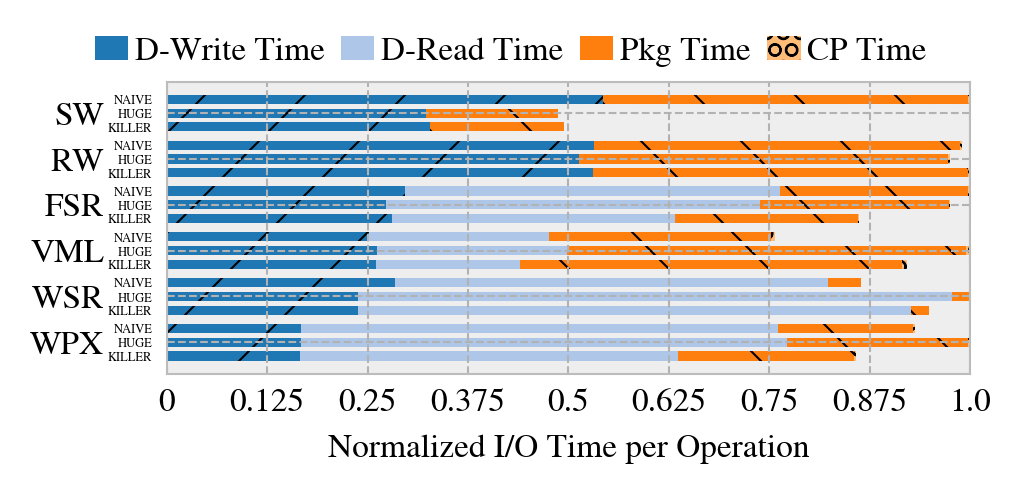

In [89]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))
bar_width = 0.3
true_width = 0.2
inner_width = 0.1
num_job = 1

# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['/', '', '\\', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time and I/O Size Breakdown", "(b) PMFS I/O Time and I/O Size Breakdown"]
scales = [4, 1]
cmap="tab20"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER"] 
        #  "./performance-comparison-table-filebench-PMFS", "performance-comparison-table-fio-PMFS"]
workloads = ["write", "randwrite", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SW", "RW", "FSR", "VML", "WSR", "WPX"]
# workloads = ["write", "webproxy.f"]
# workloads_remap = ["SW", "WPX"]

workloads.reverse()
workloads_remap.reverse()

breakdown_times = ["data_read_time(ns)", "data_write_time(ns)", "update_entry_time(ns)", "update_inode_time(ns)", "journal_time(ns)", "update_page_tail_time(ns)"]
breakdown_IO = [ "data_read(bytes)", "data_write(bytes)", "meta_read(bytes)", "meta_write(bytes)", "media_read(byte)", "media_write(byte)"]
bars = []
global_color_idx = 0
color_map = {}
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')
    # sort_dict = {
    #     "KILLER" : 2, 
    #     "KILLER-NO-PREFETCH": 1,
    #     "KILLER-NAIVE": 0,
    # }
    # sort_df = pd.DataFrame(df['file_system'].map(sort_dict))
    # df = df.iloc[sort_df.sort_values(by = ["file_system"]).index]
    # print(df)
    fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    
    # fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
    breakdown_times = ["data_write_time(ns)", "data_read_time(ns)", "update_package_time(ns)", "update_bm_time(ns)"]
    # df.columns[14:]
    # breakdown_times = breakdown_times.insert(0, "data_read_time(ns)")
    # breakdown_times = breakdown_times.insert(1, "data_write_time(ns)")
    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))
    
    subfig = plt.subplot(1, 1, fid + 1) 
    # ax2 = subfig.twinx()
    pivots = []
    
    workload_map = {
        "write": [],
        "randwrite": [],
        "fileserver.f": [],
        "varmail.f": [],
        "webserver.f": [],
        "webproxy.f": []
    }

    for fs_idx, fs in enumerate(fss):
        for workload_id, workload in enumerate(workloads):
            total_time = 0
            for idx, time in enumerate(breakdown_times):
                width = df[(df['workloads'] == workload) & (df['file_system'] == fs)][time].iloc[0] / 1000000000 / int(df[(df['workloads'] == workload) & (df['file_system'] == fs)]["ops"].iloc[0])
                total_time += width
            workload_map[workload].append(total_time)
    
    for fs_idx, fs in enumerate(fss):
        for workload_id, workload in enumerate(workloads):
            # global_color_idx = 0
            global_color_idx = fid * len(breakdown_times) 
            left = 0
            # for pivot in x:
            #     point = pivot - len(fss) * bar_width / 2 + bar_width / 2 + idx * bar_width
            #     points.append(point)
            # - tot / 2 + bar_width / 2 + idx * bar_width
            
            pivot = x[workload_id] - len(fss) * bar_width / 2 + bar_width / 2 + fs_idx * bar_width 
            pivots.append(pivot)
            # + bar_width / 2
            inner_left = 0
            inner_left_range = []
            start = False
            for idx, time in enumerate(breakdown_times):
                width = df[(df['workloads'] == workload) & (df['file_system'] == fs)][time].iloc[0] / 1000000000 / int(df[(df['workloads'] == workload) & (df['file_system'] == fs)]["ops"].iloc[0]) / max(workload_map[workload]) 
                
                orig_global_color_idx = global_color_idx
                if fid == 1 and idx in [0, 1, 3, 4]:
                    global_color_idx = color_map[time]
                
                bar, = subfig.barh(y=pivot, width=width, color=plt.get_cmap(cmap)(global_color_idx), left=left, height=true_width, hatch=patterns[idx],linewidth=0.5, label=time)
                left = left + width 
                
                global_color_idx = orig_global_color_idx

                if fid == 0:
                    color_map[time] = global_color_idx
                    global_color_idx += 1
                    if workload_id == 0:
                        bars.append(bar)
                else:
                    if idx not in [0, 1, 3, 4]:
                        global_color_idx += 1
                    if workload_id == 0:
                        if idx not in [0, 1, 3, 4]:
                            bars.append(bar)
                
    subfig.set_xlabel("Normalized I/O Time per Operation", fontsize=8)
    if fid == 0:
        subfig.set_xlim([0, 1])
        subfig.set_xticks([0, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750, 0.875, 1.000])
        subfig.set_xticklabels([0, 0.125, 0.250, 0.375, 0.500, 0.625, 0.750,0.875, 1.000], fontsize=8)
        # subfig.set_xticks([0, 5, 10, 15, 20, 25, 30, 35, 40])
        # subfig.set_xticklabels([0, 5, 10, 15, 20, 25, 30, 35, 40], fontsize=8)
        pass
    else:
        subfig.set_yticks([0, 11, 22, 33, 44])
        subfig.set_yticklabels([0, 11, 22, 33, 44], fontsize=8)
    ax2.set_ylim(subfig.get_ylim())
    # subfig.set_ylim([1, 3])
    subfig.set_yticks(x, minor=False)
    if fid == 0:
        subfig.set_yticklabels(workloads_remap, fontsize=8, minor=False)
    else:
        subfig.set_yticklabels([], fontsize=8)

    subfig.tick_params(bottom=False, top=False, left=False, right=False)
    
    # ax2.set_yticks(pivots)
    fss = fss.map({
        "KILLER-NAIVE": "NAIVE",
        "KILLER-NO-PREFETCH": "HUGE",
        "KILLER": "KILLER"
    })
    yticklabels = list(fss)
    yticklabels = yticklabels * 6
    pivots.sort()
    pivots = [ round(pivot, 1) for pivot in pivots]
    pivots = [ pivot - 0.01 if pivot in x else pivot for pivot in pivots]
    print(pivots)
    subfig.set_yticks(pivots, minor=True)
    subfig.set_yticklabels(yticklabels, minor=True, fontsize=3)
    subfig.get_yaxis().set_tick_params(which='major', pad=15)
    print(pivots)

    # ax2.set_yticklabels(['Huge+P', 'Huge+P', 'Huge', 'Huge', 'Naive', 'Naive'], fontsize=7)
    
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
        
    subfig.tick_params(bottom=False, top=False, left=False, right=False, which='minor')
    # subfig.title.set_text(titles[fid], fontsize=8)
print(len(bars))
# legends = ["T-D-Rd", "T-D-Wr", "T-M-E", "T-M-I", "T-M-Jnl", "T-M-T", "T-M-Idx", "T-M-DE", "IO-D", "IO-M" ]
legends = ["D-Write Time", "D-Read Time", "Pkg Time", "CP Time" ]
fig.legend(handles=bars, labels=legends, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-KILLERPerfBreakDown.pdf", bbox_inches='tight', pad_inches=0)


# Pipeline Study

[['data_time(ns)'], ['data_time(ns)', 'update_package_time(ns)'], ['data_time(ns)', 'update_package_time(ns)', 'update_bm_time(ns)'], ['data_time(ns)', 'meta_time(ns)'], ['data_time(ns)', 'meta_time(ns)']]
[['data_time(ns)', 'meta_time(ns)']]
[['data_time(ns)', 'meta_time(ns)']]


'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


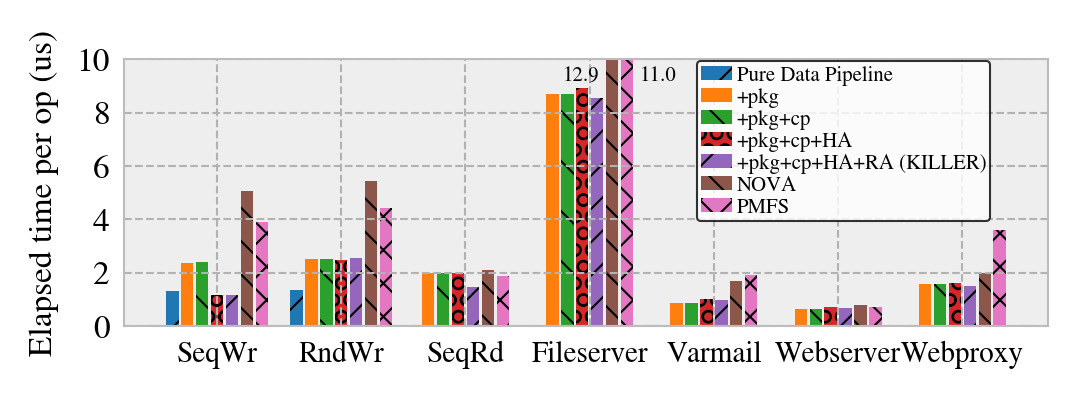

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54

matplotlib.rcParams['text.usetex'] = False
style.use('bmh')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams['hatch.linewidth'] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(3)))
bar_width = 0.12
true_width = 0.1
inner_width = 0.1
num_job = 1

ops = [
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 79240 * 60, 437532 * 60, 580830 * 60, 344069 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47087 * 60, 264382 * 60, 502315 * 60, 263680 * 60],
    [32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 32 * 1024 * 1024 / 4, 47205 * 60, 268363 * 60, 558425 * 60, 183316 * 60],
]


# Reference: https://coolors.co/palettes/popular/6%20colors
colors = ["#093baa", "#0f67e8", "#0078e0", "#0087ff", "#99cfff", "#ffffff"]
patterns = ['//', '', '\\\\', "OOO", "///", "\\\\\\", "xxx"]
titles = ["(a) NOVA I/O Time and I/O Size Breakdown", "(b) PMFS I/O Time and I/O Size Breakdown"]
scales = [4, 1]
cmap="tab10"
# files = ["./avg-test-result-single-in-paper", "../FIG_CP_Prefetch/performance-comparison-table"]
files = ["./performance-comparison-table-KILLER", "./performance-comparison-table-NOVA", 
         "performance-comparison-table-PMFS"]

workloads = ["write", "randwrite", "read", "fileserver.f", "varmail.f", "webserver.f", "webproxy.f"]
workloads_remap = ["SeqWr", "RndWr", "SeqRd", "Fileserver", "Varmail", "Webserver", "Webproxy"]

fss = ["Pure Data Pipeline", "+pkg", "+pkg+cp", "+pkg+cp+HA", "+pkg+cp+HA+RA (KILLER)", "NOVA", "PMFS"]
# fss = ["NOVA-data", "NOVA-data+meta", "PMFS-data", "PMFS-data+meta", "KILLER-data", "KILLER-data+pkg", "KILLER-data+pkg+cp"]
colors = ["#aec7e8", "#1f77b4", '#98df8a', "#2ca02c", "#ffcac9", "#ff9896", "#d62728"]
bars = []

global_color_idx = 0
color_map = {}
base_id = 0
for fid, file in enumerate(files):
    # subfig = plt.subplot(1, 2, fid + 1)
    with open(file, "r") as f:
        df = pd.read_csv(f, delim_whitespace=True, engine='python')
    if fid == 0:
        breakdown_times = [["data_time(ns)"], ["data_time(ns)", "update_package_time(ns)"], ["data_time(ns)", "update_package_time(ns)", "update_bm_time(ns)"], ["data_time(ns)", "meta_time(ns)"], ["data_time(ns)", "meta_time(ns)"]]
    else:
        breakdown_times = [["data_time(ns)", "meta_time(ns)"]]

    print(breakdown_times)
    x = list(range(1, len(workloads) + 1))  
    
    pivots = []

    
    for break_down_idx, break_down_time in enumerate(breakdown_times):
        times = []
        pivots = []
        
        for workload_id, workload in enumerate(workloads):
            if workload_id > 1:
                pivot = x[workload_id] - (len(fss) - 1) * bar_width / 2 + bar_width / 2 + (break_down_idx + base_id - 1) * bar_width 
            else:
                pivot = x[workload_id] - len(fss) * bar_width / 2 + bar_width / 2 + (break_down_idx + base_id) * bar_width 
            pivots.append(pivot)
            time = 0
            if fid == 0:
                if break_down_idx == 3:
                    fs = "KILLER-NO-PREFETCH"
                elif break_down_idx == 4:
                    fs = "KILLER"
                else:
                    fs = "KILLER-NAIVE"
                if workload == "read":
                    time += df[(df['workloads'] == workload) & (df['file_system'] == fs)]["data_read_time(ns)"].iloc[0] / 1000 / ops[fid][workload_id]
                else:
                    for _time in break_down_time:
                        time += df[(df['workloads'] == workload) & (df['file_system'] == fs)][_time].iloc[0] / 1000 / ops[fid][workload_id]
            else:
                if workload == "read":
                    time += df[(df['workloads'] == workload)]["data_read_time(ns)"].iloc[0] / 1000 / ops[fid][workload_id]
                else:
                    for _time in break_down_time:
                        time += df[(df['workloads'] == workload)][_time].iloc[0] / 1000 / ops[fid][workload_id]
            
            times.append(time)
        
            if workload_id == 3: # file server
                if fid == 1 and break_down_idx == 0:
                    plt.text(pivots[workload_id] - 0.1, 9, round(time, 1), ha='right', va='bottom', fontsize=5)
                if fid == 2 and break_down_idx == 0:
                    plt.text(pivots[workload_id] + 0.1, 9, round(time, 1), ha='left', va='bottom', fontsize=5)

        if global_color_idx == 0:
            bar = plt.bar(x=pivots[:2], height=times[:2], color=plt.get_cmap(cmap)(global_color_idx), width=true_width, hatch=patterns[global_color_idx], linewidth=0.5)
        else:
            bar = plt.bar(x=pivots, height=times, color=plt.get_cmap(cmap)(global_color_idx), width=true_width, hatch=patterns[global_color_idx], linewidth=0.5)


        global_color_idx += 1
    
    base_id += len(breakdown_times)
         
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)     
    ax.set_ylim([0, 10])
    plt.yticks([0, 2, 4, 6, 8, 10], fontsize=8)
    ax.set_ylabel("Elapsed time per op (us)", fontsize=8)
    ax.set_xticks(x, minor=False)
    # if fid == 0:
    ax.set_xticklabels(workloads_remap, fontsize=7, minor=False)
    # else:
    #     ax.set_xticklabels([], fontsize=8)

    plt.tick_params(bottom=False, top=False, left=False, right=False)
    
leg = ax.legend(fss, loc='upper right', bbox_to_anchor=(-0.06,0,1,1), bbox_transform=ax.transAxes, ncol=1, fontsize=5, frameon=True, columnspacing=0.5, handletextpad=0.2, borderaxespad=0.1, handlelength=1.5, labelspacing=0.1, borderpad=0.2)

frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_edgecolor('black')

# legends = ["D-Write Time", "D-Read Time", "Pkg Time", "CP Time" ]
# fig.legend(labels=fss, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05), frameon=False, columnspacing=0.5, handletextpad=0.2, handlelength=1, borderpad=0.2, labelspacing=0.2, fontsize=8)
plt.tight_layout(pad=0.4)
plt.savefig("./FIG-KILLERPerfBreakDown.pdf", bbox_inches='tight', pad_inches=0)
